# Machine learning supervisado


### Ejercicio

In [ ]:
import pandas as pd

casas = {'Tamaño': [50, 60, 70, 80, 90, 100, None, 120],
         'Habitaciones': [1, 2, 2, 3, 3, 3, 4, 4],
         'Ubicacion': [1, 1, 2, 2, 3, 3, 4, 4], #1: centro, 4: periferia
         'Precio': [150000, 170000, 190000, 210000, 230000, 250000, 270000, 280000]
         }

df = pd.DataFrame(casas)
df['Tamaño'] = df['Tamaño'].fillna(df['Tamaño'].mean())
df.isnull().sum()

,0
Tamaño,0
Habitaciones,0
Ubicacion,0
Precio,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['Tamaño', 'Habitaciones', 'Ubicacion']]
y = df['Precio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42) #random_state asegura reproducibilidad entre divisiones

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')

#Precio = 50000 + 2000 * x1 + 10000 * x2 - 5000 * x3

MSE: 106432666.31


## PCA: maldicion de la dimensionalidad

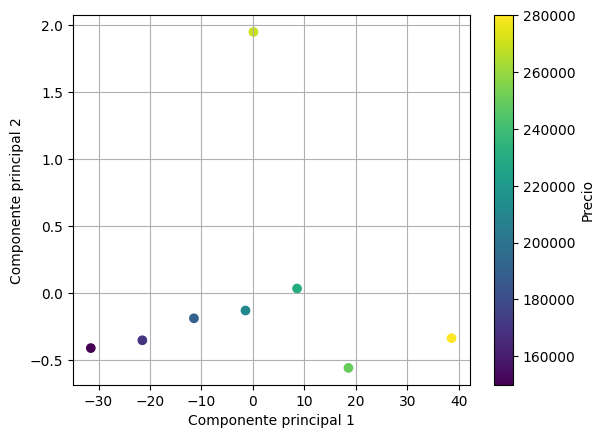

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2) #para graficar solo se pueden poner 2 o 3, lo que permite explorar mejor los patrones o agrupacion de los datos
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y) # los [:, #] recorre los valores del componente principal de cada punto, mientras que el c representa
#los valores de cada punto respecto a la variable objetivo
plt.colorbar(label = 'Precio')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.grid()
plt.show()

#El PCA debe contemplar un minimo de varianza explicada, es decir la proporcion de variabilidad total en el conjunto de datos que se atribuyen a un modelo.
#Esto se puede observar con el grafico de codo, donde el codo se forma en el umbral de varianza

El objetivo de PCA es reconocer patrones en una mayor dimension. Los puntos mas calidos representan casas más caras.

### Ejercicios

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([60, 80, 100]).reshape(-1, 1)
y = np.array([180000, 220000, 260000])

model = LinearRegression()
model.fit(X, y)

print(f'Intercepto: {model.intercept_:.0f}')
print(f'Pendiente: {model.coef_[0]:.0f}')
print(f'Prediccion para 90 m2: {model.predict([[90]])[0]:.0f}')

Intercepto: 60000
Pendiente: 2000
Prediccion para 90 m2: 240000


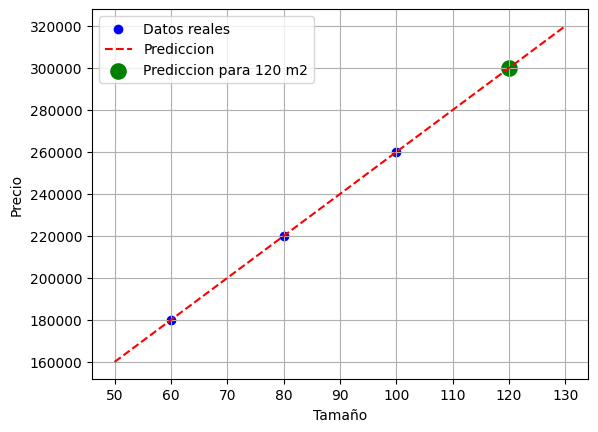

In [ ]:
X = np.array([60, 80, 100, 120]).reshape(-1, 1)
y = np.array([180000, 220000, 260000, 300000])

tam = np.linspace(50, 130, 100)
precio_pred = 60000 + 2000 * tam

plt.scatter(X, y, color = 'blue', label = 'Datos reales')
plt.plot(tam, precio_pred, color = 'red', linestyle = '--', label = 'Prediccion')
plt.scatter(120, 300000, color = 'green', s = 120, label = 'Prediccion para 120 m2')
plt.xlabel('Tamaño')
plt.ylabel('Precio')
plt.legend()
plt.grid()
plt.show()

## Tipos de errores

In [ ]:
estudiantes = {'Horas_estudio': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
               'Notas': [50, 60, 65, 70, 75, 80, 85, 90, 95, 98]}

df = pd.DataFrame(estudiantes)

model = LinearRegression()
model.fit(df[['Horas_estudio']], df['Notas'])
error_train = 1 - model.score(df[['Horas_estudio']], df['Notas'])
print(f'Error de entrenamiento: {error_train:.2f}')

X_train, X_test, y_train, y_test = train_test_split(df[['Horas_estudio']], df['Notas'], test_size= 0.2, random_state = 42)
model.fit(X_train, y_train)
error_test = 1 - model.score(X_test, y_test)
print(f'Error de prueba: {error_test:.2f}')

Error de entrenamiento: 0.01
Error de prueba: 0.00


## Validacion Cruzada

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = np.array([[5, 80], [7, 85], [6, 90], [8, 75], [7, 70],
             [9, 95], [10, 90], [4, 60], [6, 65], [8, 88],
             [5, 50], [7, 78], [6,82], [9, 92], [10, 85]])
y = np.array([1, 1, 1, 1, 0,
              1, 1, 0, 0, 1,
              0, 1, 1, 1, 1])

df = pd.DataFrame(X, columns = ['Horas_estudio', '%_Asistencia'])
df['Nota_final'] = y
df

,Horas_estudio,%_Asistencia,Nota_final
0,5,80,1
1,7,85,1
2,6,90,1
3,8,75,1
4,7,70,0
5,9,95,1
6,10,90,1
7,4,60,0
8,6,65,0
9,8,88,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['Horas_estudio', '%_Asistencia']], df['Nota_final'], test_size = 0.3, random_state = 42)
print('Dimensiones de los conjuntos de datos')
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

Dimensiones de los conjuntos de datos
X_train: (10, 2)
y_train: (10,)
X_test: (5, 2)
y_test: (5,)


In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
print(f'Exactitud del modelo: {accuracy}')

Exactitud del modelo: 1.0


In [ ]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
accuracys_kf = []

for fold, (train_index, test_index) in enumerate(kf.split(X)):
  X_train_fold, X_test_fold = X[train_index], X[test_index]
  y_train_fold, y_test_fold = y[train_index], y[test_index]

  model_kf = DecisionTreeClassifier(random_state = 42)
  model_kf.fit(X_train_fold, y_train_fold)
  y_pred_kf = model_kf.predict(X_test_fold)

  accuracy_kf = accuracy_score(y_test_fold, y_pred_kf)
  accuracys_kf.append(accuracy_kf)
  print(f'Precision del modelo en el fold {fold + 1}: {accuracy_kf:.2f}')

media_accuracy_kf = np.mean(accuracys_kf)
std_accuracy_kf = np.std(accuracys_kf)
print(f'Media de las presiciones: {media_accuracy_kf}')
print(f'Desviacion estandar de las presiciones: {std_accuracy_kf}')

Precision del modelo en el fold 1: 1.00
Precision del modelo en el fold 2: 1.00
Precision del modelo en el fold 3: 1.00
Precision del modelo en el fold 4: 1.00
Precision del modelo en el fold 5: 1.00
Media de las presiciones: 1.0
Desviacion estandar de las presiciones: 0.0


In [ ]:
loo = LeaveOneOut()
accuracys_loo = []

for i, (train_index, test_index) in enumerate(loo.split(X)):
  X_train_loo, X_test_loo = X[train_index], X[test_index]
  y_train_loo, y_test_loo = y[train_index], y[test_index]

  model_loo = DecisionTreeClassifier(random_state = 42)
  model_loo.fit(X_train_loo, y_train_loo)
  y_pred_loo = model_kf.predict(X_test_loo)

  accuracy_loo = accuracy_score(y_test_loo, y_pred_loo)
  accuracys_loo.append(accuracy_loo)
  print(f'Precision del modelo en la iteracion {i + 1}: {accuracy_loo:.2f}')

media_accuracy_loo = np.mean(accuracys_loo)
std_accuracy_loo = np.std(accuracys_loo)
print(f'Media de las presiciones: {media_accuracy_loo}')
print(f'Desviacion estandar de las presiciones: {std_accuracy_loo}')

Precision del modelo en la iteracion 1: 1.00
Precision del modelo en la iteracion 2: 1.00
Precision del modelo en la iteracion 3: 1.00
Precision del modelo en la iteracion 4: 1.00
Precision del modelo en la iteracion 5: 1.00
Precision del modelo en la iteracion 6: 1.00
Precision del modelo en la iteracion 7: 1.00
Precision del modelo en la iteracion 8: 1.00
Precision del modelo en la iteracion 9: 1.00
Precision del modelo en la iteracion 10: 1.00
Precision del modelo en la iteracion 11: 1.00
Precision del modelo en la iteracion 12: 1.00
Precision del modelo en la iteracion 13: 1.00
Precision del modelo en la iteracion 14: 1.00
Precision del modelo en la iteracion 15: 1.00
Media de las presiciones: 1.0
Desviacion estandar de las presiciones: 0.0


In [ ]:
kf_score = cross_val_score(DecisionTreeClassifier(random_state = 42), X, y, cv = kf, scoring = 'accuracy')
print(f'Precision por subconjunto: {kf_score}')
print(f'Promedio de la precision por subconjunto: {kf_score.mean():.2f}')
print(f'Desviacion estandar de la precision por subconjunto: {kf_score.std():.2f}')

Precision por subconjunto: [1. 1. 1. 1. 1.]
Promedio de la precision por subconjunto: 1.00
Desviacion estandar de la precision por subconjunto: 0.00


In [ ]:
loo_score = cross_val_score(DecisionTreeClassifier(random_state = 42), X, y, cv = loo, scoring = 'accuracy')
print(f'Precision de loo: {loo_score}')
print(f'Promedio de la precision de loo: {loo_score.mean():.2f}')
print(f'Desviacion estandar de la precision de loo: {loo_score.std():.2f}')

Precision de loo: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Promedio de la precision de loo: 1.00
Desviacion estandar de la precision de loo: 0.00


## Preprocesamiento

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

data = {'Producto': ['Camisa', 'Pantalon', None, 'Zapatos', 'Camisa', 'Camisa'],
        'Precio': [20, 40, 30, None, 20, 25],
        'Color': ['Rojo', 'Azul', 'Verde', 'Azul', 'Rojo', 'Rojo']}

df =pd.DataFrame(data)
df

,Producto,Precio,Color
0,Camisa,20.0,Rojo
1,Pantalon,40.0,Azul
2,None,30.0,Verde
3,Zapatos,NaN,Azul
4,Camisa,20.0,Rojo
5,Camisa,25.0,Rojo


### Eliminar valores nulos

In [ ]:
df_clean = df.dropna()
df_clean

,Producto,Precio,Color
0,Camisa,20.0,Rojo
1,Pantalon,40.0,Azul
4,Camisa,20.0,Rojo
5,Camisa,25.0,Rojo


### Eliminar duplicados

In [ ]:
df_sin_dupl = df_clean.drop_duplicates()
df_sin_dupl

,Producto,Precio,Color
0,Camisa,20.0,Rojo
1,Pantalon,40.0,Azul
5,Camisa,25.0,Rojo


### Codificar variables categoricas

In [ ]:
df = df_sin_dupl.reset_index(drop = True)

le = LabelEncoder()
df['Producto_Encode'] = le.fit_transform(df['Producto'])
print(df)
print(f'Mapeo del LabelEncoder para la variable producto: {list(le.classes_)}')

   Producto  Precio Color  Producto_Encode
0    Camisa    20.0  Rojo                0
1  Pantalon    40.0  Azul                1
2    Camisa    25.0  Rojo                0
Mapeo del LabelEncoder para la variable producto: ['Camisa', 'Pantalon']


### Variables dummy

In [ ]:
df_encode = pd.get_dummies(df, columns = ['Color'], prefix = 'Color')
df_encode

,Producto,Precio,Producto_Encode,Color_Azul,Color_Rojo
0,Camisa,20.0,0,False,True
1,Pantalon,40.0,1,True,False
2,Camisa,25.0,0,False,True


### LabelEnconder y OneHotEncoder

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler

data = {'Producto': ['Camisa', 'Pantalon', None, 'Zapatos', 'Camisa'],
        'Color': ['Rojo', 'Azul', 'verde', 'rojo', 'ROJO'],
        'Tamaño': ['S', 'L', 'M', None, 'S'],
        'Precio': [100, 200, 150, np.nan, 100]
        }

df = pd.DataFrame(data)
df.head()

,Producto,Color,Tamaño,Precio
0,Camisa,Rojo,S,100.0
1,Pantalon,Azul,L,200.0
2,None,verde,M,150.0
3,Zapatos,rojo,None,NaN
4,Camisa,ROJO,S,100.0


In [ ]:
df_sin_nulos = df.dropna()
df_sin_nulos

,Producto,Color,Tamaño,Precio
0,Camisa,Rojo,S,100.0
1,Pantalon,Azul,L,200.0
4,Camisa,ROJO,S,100.0


In [ ]:
df_sin_nulos['Color'] = df_sin_nulos['Color'].str.lower()
df_sin_nulos

/tmp/ipython-input-784639484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos['Color'] = df_sin_nulos['Color'].str.lower()


,Producto,Color,Tamaño,Precio
0,Camisa,rojo,S,100.0
1,Pantalon,azul,L,200.0
4,Camisa,rojo,S,100.0


In [ ]:
le = LabelEncoder()

df_sin_nulos['Tamaño_le'] = le.fit_transform(df_sin_nulos['Tamaño'])
df_sin_nulos #la asignacion es alfabetica

/tmp/ipython-input-287345905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_nulos['Tamaño_le'] = le.fit_transform(df_sin_nulos['Tamaño'])


,Producto,Color,Tamaño,Precio,Tamaño_le
0,Camisa,rojo,S,100.0,1
1,Pantalon,azul,L,200.0,0
4,Camisa,rojo,S,100.0,1


In [ ]:
ohe = OneHotEncoder()

color_encoded = ohe.fit_transform(df_sin_nulos[["Color"]]).toarray()
color_encoded

array([[0., 1.],
       [1., 0.],
       [0., 1.]])

### Escalamiento: el concepto de distancia

In [ ]:
min_max = MinMaxScaler()

df_sin_nulos['Precio_min_max'] = min_max.fit_transform(df_sin_nulos[['Precio']])
df_sin_nulos

,Producto,Color,Tamaño,Precio,Tamaño_le,Precio_min_max
0,Camisa,rojo,S,100.0,1,0.0
1,Pantalon,azul,L,200.0,0,1.0
4,Camisa,rojo,S,100.0,1,0.0


In [ ]:
ss = StandardScaler()

df_sin_nulos['Precio_ss'] = ss.fit_transform(df_sin_nulos[['Precio']])
df_sin_nulos

,Producto,Color,Tamaño,Precio,Tamaño_le,Precio_min_max,Precio_ss
0,Camisa,rojo,S,100.0,1,0.0,-0.707107
1,Pantalon,azul,L,200.0,0,1.0,1.414214
4,Camisa,rojo,S,100.0,1,0.0,-0.707107


## Modelamiento

### LinnearRegression

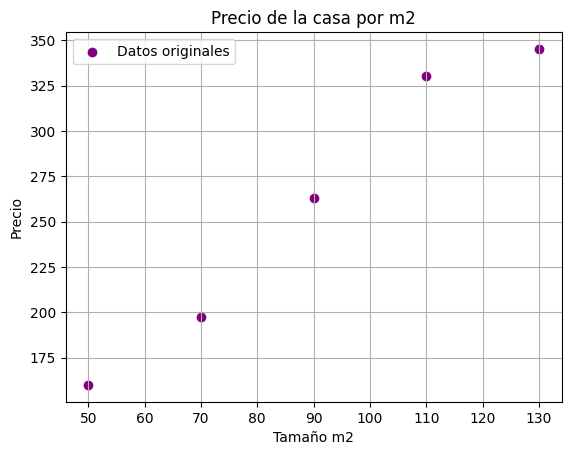

Intercepto: 32.38
Pendiente: 2.52
MSE: 160.19
R2: 0.97


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

np.random.seed(42)

X = np.array([50, 70, 90, 110, 130]).reshape(-1, 1)
y = np.array([150, 200, 250, 300, 350]) + np.random.normal(0, 20, 5)

plt.scatter(X, y, color = 'purple', label = 'Datos originales')
plt.xlabel('Tamaño m2')
plt.ylabel('Precio')
plt.title('Precio de la casa por m2')
plt.legend()
plt.grid()
plt.show()

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
intercepto = model.intercept_
pendiente = model.coef_[0]
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Intercepto: {intercepto:.2f}')
print(f'Pendiente: {pendiente:.2f}')
print(f'MSE: {mse:.2f}')
print(f'R2: {r2:.2f}')

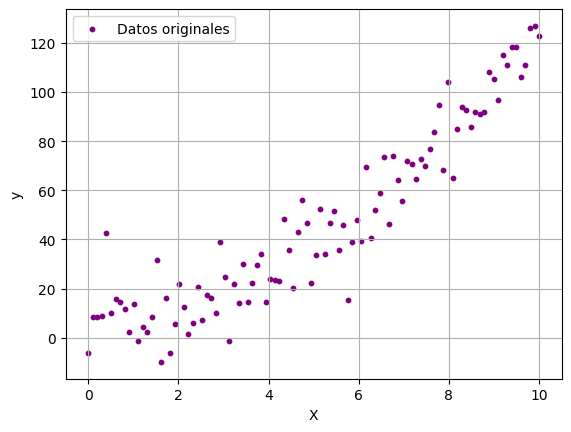

LinearRegression: MSE=278, R2=  1
PolynomialFeature: MSE=177, R2=  1
DecisionTreeRegressor: MSE=306, R2=  1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 + X**2 + 2*X + np.random.randn(100, 1)*10

plt.scatter(X, y, color = 'purple', s = 10, label = 'Datos originales')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred_lin = lin.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

trr = DecisionTreeRegressor(random_state = 42)
trr.fit(X_train, y_train)
y_pred_trr = trr.predict(X_test)
mse_trr = mean_squared_error(y_test, y_pred_trr)
r2_trr = r2_score(y_test, y_pred_trr)

print('LinearRegression: MSE=%2.f, R2=%3.f' % (mse_lin, r2_lin))
print('PolynomialFeature: MSE=%2.f, R2=%3.f' % (mse_poly, r2_poly))
print('DecisionTreeRegressor: MSE=%2.f, R2=%3.f' % (mse_trr, r2_trr))

### Ridge, Lasso

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

#Ambos se aplican en overfitting del modelo

#Minimiza la sumatoria de los beta_{j}, eliminado las variables irrelevantes -> es mejor detectar variables relevantes
ridge = Ridge(alpha = 1.0) #mayor valor -> mayor penalizacion
score_ridge = cross_val_score(ridge, X_train_poly, y_train.ravel(), cv = 5, scoring = 'neg_mean_squared_error')

#Minimiza la sumatoria del valor absoluto de los beta_{j}, acercando los coefientes mas al 0 para quedarse solo con los coefientes relevantes
#Es mejor para trabajar con multiples variables y detectar aquellas que son irrelevantes
lasso = Lasso(alpha = 0.1, max_iter = 10000)
score_lasso = cross_val_score(lasso, X_train_poly, y_train.ravel(), cv = 5, scoring = 'neg_mean_squared_error')

print('Ridge MSE promedio: ()', np.mean(score_ridge))
print('Lasso MSE promedio: ()', np.mean(score_lasso))

Ridge MSE promedio: () -100.33450774114824
Lasso MSE promedio: () -100.08596364179817


## Optimizacion de modelos

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('ridge', Ridge())])

param_grid = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(pipeline, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid.fit(X_train_poly, y_train.ravel())#ravel se aplica sobre los datos de entrenamiento para ajustar los valores al modelo
#en el caso de una regresion lineal, convierte al y en un vector unidimensional

print('Mejor alpha: ', grid.best_params_)
print('Mejor score (Neg MSE): ', grid.best_score_)

Mejor alpha:  {'ridge__alpha': 0.1}
Mejor score (Neg MSE):  -100.25729913224315


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

np.random.seed(42)

X = np.random.normal(0, 10, 100).reshape(-1, 1)
y = 3*X**2 + 2*X - X**3 + np.random.randn(100, 1) * 10
y = y.ravel()

poly = PolynomialFeatures(degree = 5, include_bias = False)
#include_bias controla la inclusion de una columna unitario de intercepto
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 42)

ridge = Ridge()

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

ridge_search = GridSearchCV(ridge, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
ridge_search.fit(X_train, y_train)

print('Mejor alpha: ', ridge_search.best_params_['alpha'])

Mejor alpha:  0.001


In [19]:
lasso = Lasso(max_iter = 10000)

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}

lasso_search = GridSearchCV(lasso, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
lasso_search.fit(X_train, y_train)

print('Mejor alpha: ', lasso_search.best_params_['alpha'])

Mejor alpha:  0.0001


In [22]:
from sklearn.metrics import mean_squared_error, r2_score

best_ridge = ridge_search.best_estimator_
best_lasso = lasso_search.best_estimator_

y_pred_ridge = best_ridge.predict(X_test)
y_pred_lasso = best_lasso.predict(X_test)

for name, y_pred in [('Ridge', y_pred_ridge), ('Lasso', y_pred_lasso)]:
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  print(f'{name} MSE: {mse:.2f}')
  print(f'{name} R2: {r2:.2f}')

Ridge MSE: 87.40
Ridge R2: 1.00
Lasso MSE: 90.15
Lasso R2: 1.00


In [23]:
import pandas as pd
import math
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

np.random.seed(42)

X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3*X**2 + 2*X + np.random.randn(100, 1) * 10
y = y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

pipe_lin = Pipeline([('scaler', StandardScaler()),
                     ('lr', LinearRegression())])

pipe_lin.fit(X_train, y_train)

y_pred_lin = pipe_lin.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
rmse_lin = math.sqrt(mse_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)

print(f'MSE LR: {mse_lin:.2f}')
print(f'RMSE LR: {rmse_lin:.2f}')
print(f'R2 LR: {r2_lin:.2f}')
print(f'MAE LR: {mae_lin:.2f}')

MSE LR: 544.17
RMSE LR: 23.33
R2 LR: 0.93
MAE LR: 17.62


In [27]:
pipe_poly2 = Pipeline([('poly', PolynomialFeatures(degree = 2, include_bias = False)), ('scaler', StandardScaler()), ('lr', LinearRegression())])
pipe_poly3 = Pipeline([('poly', PolynomialFeatures(degree = 3, include_bias = False)), ('scaler', StandardScaler()), ('lr', LinearRegression())])

pipe_poly2.fit(X_train, y_train)
pipe_poly3.fit(X_train, y_train)

y_pred_poly2 = pipe_poly2.predict(X_test)
y_pred_poly3 = pipe_poly3.predict(X_test)

def calculo_metricas(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  return {
      'mse': mse,
      'rmse': math.sqrt(mse),
      'r2': r2_score(y_true, y_pred),
      'mae': mean_absolute_error(y_true, y_pred)
  }

metricas_poly2 = calculo_metricas(y_test, y_pred_poly2)
metricas_poly3 = calculo_metricas(y_test, y_pred_poly3)

print('Metricas polinomio de grado 2\n')
print(metricas_poly2)
print('\nMetricas polinomio de grado 3\n')
print(metricas_poly3)

Metricas polinomio de grado 2

{'mse': 61.96330450394987, 'rmse': 7.871677362795675, 'r2': 0.992037856479333, 'mae': 6.006414772521426}

Metricas polinomio de grado 3

{'mse': 60.224716189603804, 'rmse': 7.760458503825905, 'r2': 0.9922612611184657, 'mae': 5.831036288398776}


In [31]:
depths = [3, 5, 10]

tree_models = {}

tree_metrics = {}

for d in depths:
  model = DecisionTreeRegressor(max_depth= d, random_state = 42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  tree_models[d] = model
  tree_metrics[d] = calculo_metricas(y_test, y_pred)

for d, m in tree_metrics.items():
    print(f"  - Profundidad {d}: {m}")

  - Profundidad 3: {'mse': 245.1465485889819, 'rmse': 15.657156465622418, 'r2': 0.9684992267748209, 'mae': 12.630936499332877}
  - Profundidad 5: {'mse': 95.16288791501441, 'rmse': 9.755146739799171, 'r2': 0.9877717856159174, 'mae': 8.055268763160633}
  - Profundidad 10: {'mse': 135.2008472515694, 'rmse': 11.62758991586689, 'r2': 0.9826269990190056, 'mae': 9.77521749249749}


In [39]:
#Ridge
pipe_ridge = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())])

param_ridge = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}

grid_ridge = GridSearchCV(pipe_ridge, param_ridge, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)

grid_ridge.fit(X_train, y_train)

best_ridge = grid_ridge.best_estimator_
alpha_ridge = grid_ridge.best_params_['ridge__alpha']

y_pred_ridge = best_ridge.predict(X_test)

metricas_ridge = calculo_metricas(y_test, y_pred_ridge)

print('Mejor alpha de Ridge', alpha_ridge)
print('Metricas de Ridge:\n')
print(metricas_ridge)

#Lasso
pipe_lasso = Pipeline([('scaler', StandardScaler()), ('lasso', Lasso())])

param_lasso = {'lasso__alpha': [0.0001, 0.001, 0.01, 0.1, 1]}

grid_lasso = GridSearchCV(pipe_lasso, param_lasso, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)

grid_lasso.fit(X_train, y_train)

best_lasso = grid_lasso.best_estimator_
alpha_lasso = grid_lasso.best_params_['lasso__alpha']

y_pred_lasso = best_lasso.predict(X_test)

metricas_lasso = calculo_metricas(y_test, y_pred_ridge)

print('Mejor alpha de Lasso', alpha_lasso)
print('Metricas de Lasso:\n')
print(metricas_lasso)

rows = []
rows.append(('Linear', ) + tuple([metrics:=calculo_metricas(y_test, y_pred_lin)[k] for k in ['mse', 'rmse', 'r2', 'mae']]))
rows.append(('Poly 2',metricas_poly2['mse'], metricas_poly2['rmse'], metricas_poly2['r2'], metricas_poly2['mae']))
rows.append(('Poly 3',metricas_poly3['mse'], metricas_poly3['rmse'], metricas_poly3['r2'], metricas_poly3['mae']))

for d in depths:
  m = tree_metrics[d]
  rows.append((f'Tree_{d}', m['mse'], m['rmse'], m['r2'], m['mae']))

rows.append((f'Ridge (alpha = {alpha_ridge})', metricas_ridge['mse'], metricas_ridge['rmse'], metricas_ridge['r2'], metricas_ridge['mae']))
rows.append((f'Lasso (alpha = {alpha_lasso})', metricas_lasso['mse'], metricas_lasso['rmse'], metricas_lasso['r2'], metricas_lasso['mae']))

df = pd.DataFrame(rows, columns = ['Modelo', 'MSE', 'RMSE', 'R2', 'MAE']).sort_values(by = 'MSE').reset_index(drop = True)
df

Mejor alpha de Ridge 0.1
Metricas de Ridge:

{'mse': 542.2730608361268, 'rmse': 23.28675719880565, 'r2': 0.9303191465927482, 'mae': 17.58738888519641}
Mejor alpha de Lasso 1
Metricas de Lasso:

{'mse': 542.2730608361268, 'rmse': 23.28675719880565, 'r2': 0.9303191465927482, 'mae': 17.58738888519641}


,Modelo,MSE,RMSE,R2,MAE
0,Poly 3,60.224716,7.760459,0.992261,5.831036
1,Poly 2,61.963305,7.871677,0.992038,6.006415
2,Tree_5,95.162888,9.755147,0.987772,8.055269
3,Tree_10,135.200847,11.627590,0.982627,9.775217
4,Tree_3,245.146549,15.657156,0.968499,12.630936
5,Ridge (alpha = 0.1),542.273061,23.286757,0.930319,17.587389
6,Lasso (alpha = 1),542.273061,23.286757,0.930319,17.587389
7,Linear,544.173661,23.327530,0.930075,17.615934


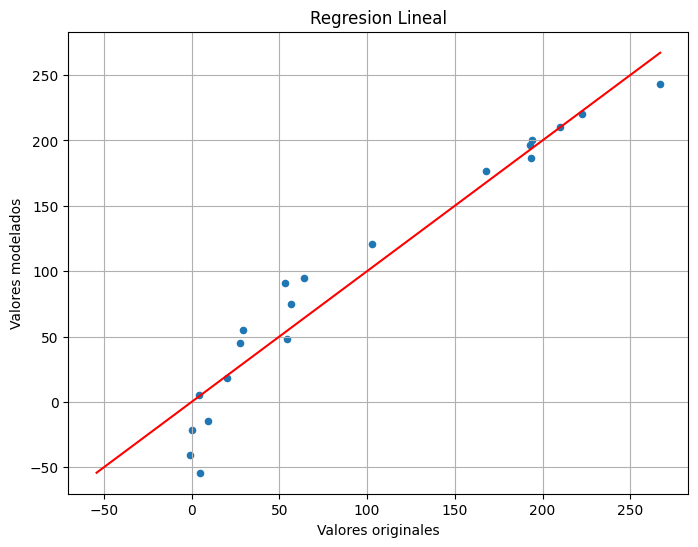

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 6))
plt.scatter(y_test, y_pred_lin, s = 20)
mn = min(y_test.min(), y_pred_lin.min())
mx = max(y_test.max(), y_pred_lin.max())
plt.plot([mn, mx], [mn, mx], color = 'red')
plt.xlabel('Valores originales')
plt.ylabel('Valores modelados')
plt.title('Regresion Lineal')
plt.grid()
plt.show()

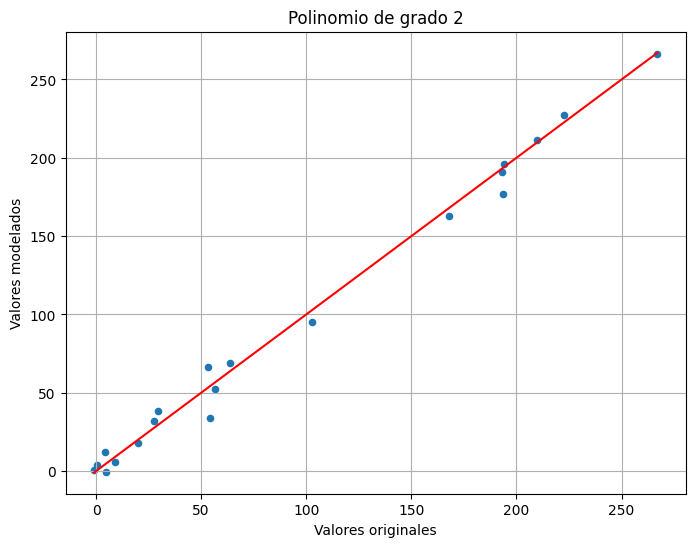

In [49]:
plt.figure(figsize = (8, 6))
plt.scatter(y_test, y_pred_poly2, s = 20)
mn = min(y_test.min(), y_pred_poly2.min())
mx = max(y_test.max(), y_pred_poly2.max())
plt.plot([mn, mx], [mn, mx], color = 'red')
plt.xlabel('Valores originales')
plt.ylabel('Valores modelados')
plt.title('Polinomio de grado 2')
plt.grid()
plt.show()

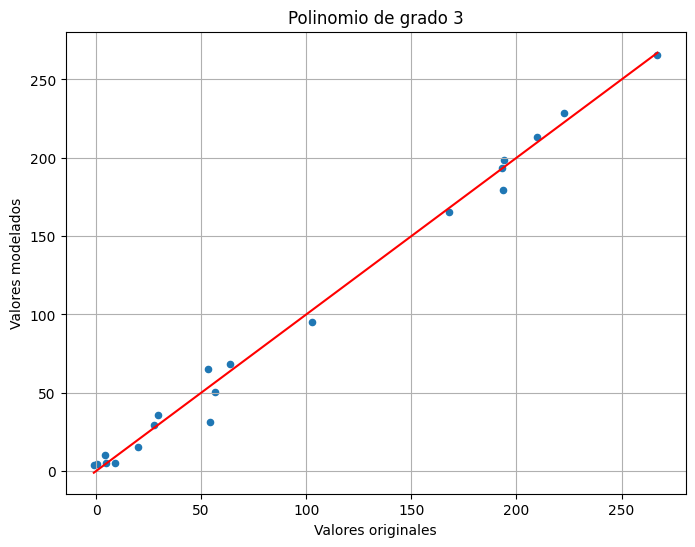

In [50]:
plt.figure(figsize = (8, 6))
plt.scatter(y_test, y_pred_poly3, s = 20)
mn = min(y_test.min(), y_pred_poly3.min())
mx = max(y_test.max(), y_pred_poly3.max())
plt.plot([mn, mx], [mn, mx], color = 'red')
plt.xlabel('Valores originales')
plt.ylabel('Valores modelados')
plt.title('Polinomio de grado 3')
plt.grid()
plt.show()

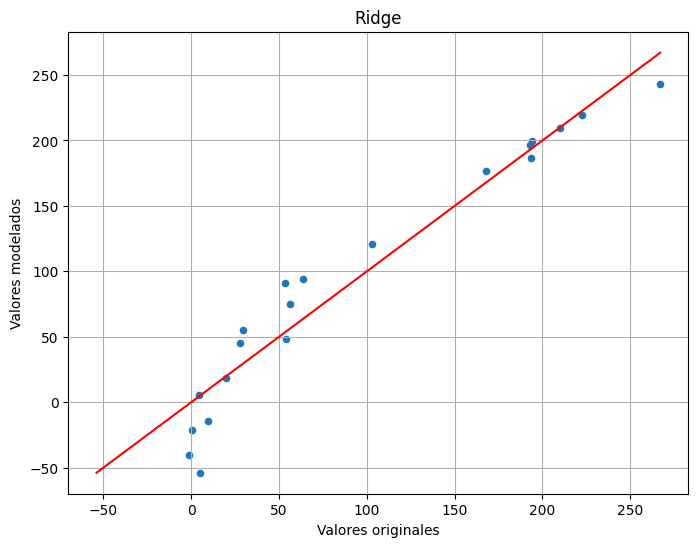

In [51]:
plt.figure(figsize = (8, 6))
plt.scatter(y_test, y_pred_ridge, s = 20)
mn = min(y_test.min(), y_pred_ridge.min())
mx = max(y_test.max(), y_pred_ridge.max())
plt.plot([mn, mx], [mn, mx], color = 'red')
plt.xlabel('Valores originales')
plt.ylabel('Valores modelados')
plt.title('Ridge')
plt.grid()
plt.show()

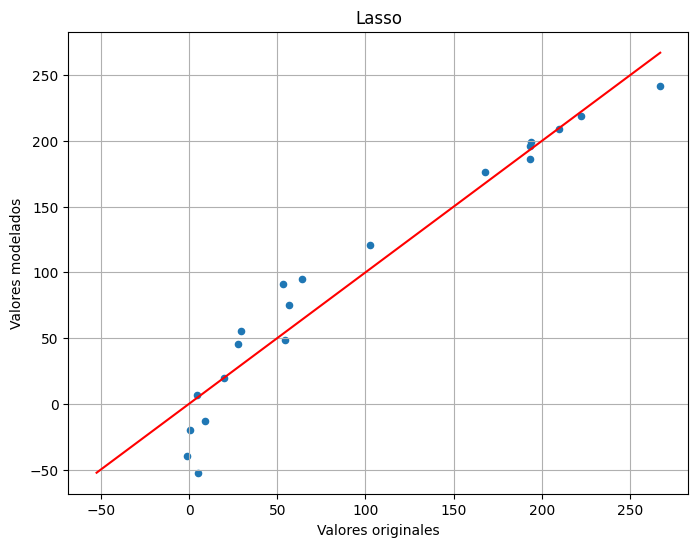

In [52]:
plt.figure(figsize = (8, 6))
plt.scatter(y_test, y_pred_lasso, s = 20)
mn = min(y_test.min(), y_pred_lasso.min())
mx = max(y_test.max(), y_pred_lasso.max())
plt.plot([mn, mx], [mn, mx], color = 'red')
plt.xlabel('Valores originales')
plt.ylabel('Valores modelados')
plt.title('Lasso')
plt.grid()
plt.show()